# TELCO CHURN PREDICTION 

<b>Customer Churn</b> is a metric that measures the percentage of customers who discontinued their use of a company's product or service within a specified time frame. This term is widely used across different industries. However, it is most commonly applied to businesses with a contractual customer base, such as mobile phone networks and pay TV operators that operate on a subscriber-based service model. To calculate the churn rate, the number of customers lost during the defined period is divided by the total number of customers. 

The churn rate can be an important indicator of various factors, such as customer dissatisfaction, a competition offering cheaper or better products or services, the competition's more effective sales and marketing strategies, or issues related to the customer life cycle.

This notebook contains exploratory data analysis of the IBM dataset. The Business objective here is to predict the telco customer churn based on the previous data.

 #  Import Libraries

In [17]:
#Import libraries
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline


In [3]:
#setting colormap for all the plots in the notebook
sns.set_palette('icefire')

#  Import the Dataset

In [6]:
#Import the dataset
churn = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Dataset Overview

In [7]:
# generate the report
profile = pandas_profiling.ProfileReport(churn)

# display the report in the notebook
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

The Telco Customer Churn dataset contains a total of <b>7043</b> rows and <b>21</b> different features.

It contains customer information such as their age, gender and if they have partner or dependents
We have columns that indicate the services a particular customer has signed up for
We have other columns that indicate customer account information such as monthly charges,contract type, payment method and others
Our target variable for this analysis is named <b>Churn</b>

In [8]:
#columns in the dataset
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
#datatypes of the features
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
#converting total charges to numeric from object
churn.TotalCharges = pd.to_numeric(churn.TotalCharges, errors='coerce')
#checking for null values in the dataset
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null/missing values in the column Total charges of our dataset. We will replace these values with zero

In [11]:
#Removing missing values from the dataset
churn.dropna(inplace = True)

In [12]:
#checking for null values in the dataset again
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing/null values in the dataset

# Exploratory Data Analysis

We will explore our dataset to understand different patterns in the dataset. We will begin by checking the target variable distribution

In [13]:
#lets explore the target variable distribution
pd.crosstab(index=churn["Churn"],  # Make a crosstab
                              columns="count")      # Name the count column

col_0,count
Churn,
No,5163
Yes,1869


From the table above, you can see there is a class imbalance in the target variable. We have more instances for negative class ("NO") compared to the class of interest ("YES").

We understand that <b>26.5%</b> of our data that is about the Churned customers

Let's investigate the dataset furthur with regards to binary categorical variables

The plot below shows distribution of binary categorical variables by the target variable

<Axes: xlabel='PaperlessBilling', ylabel='count'>

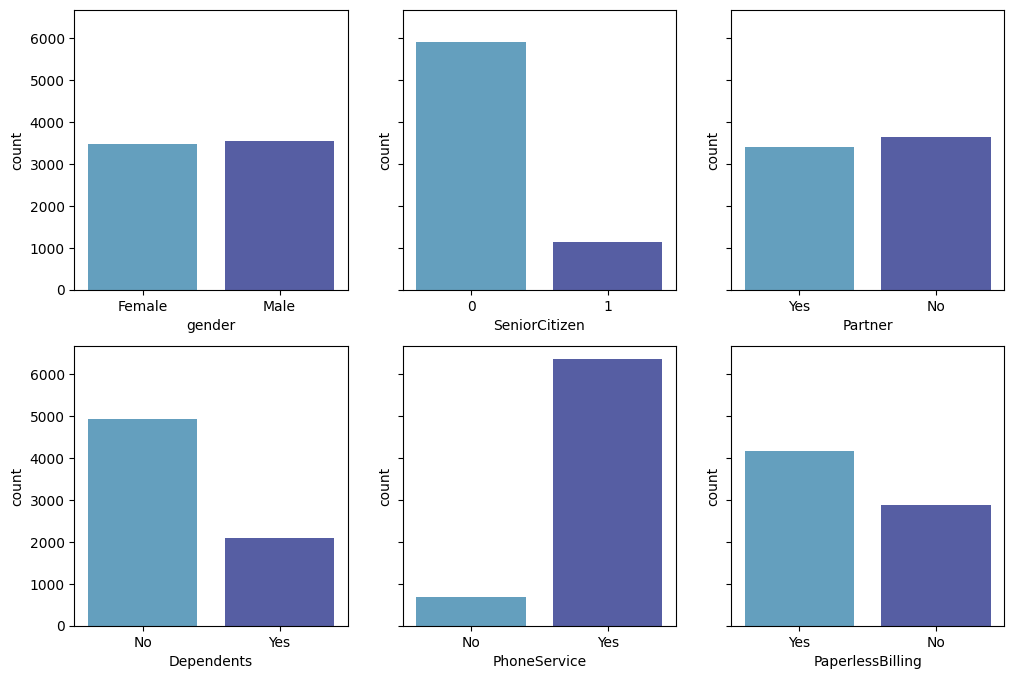

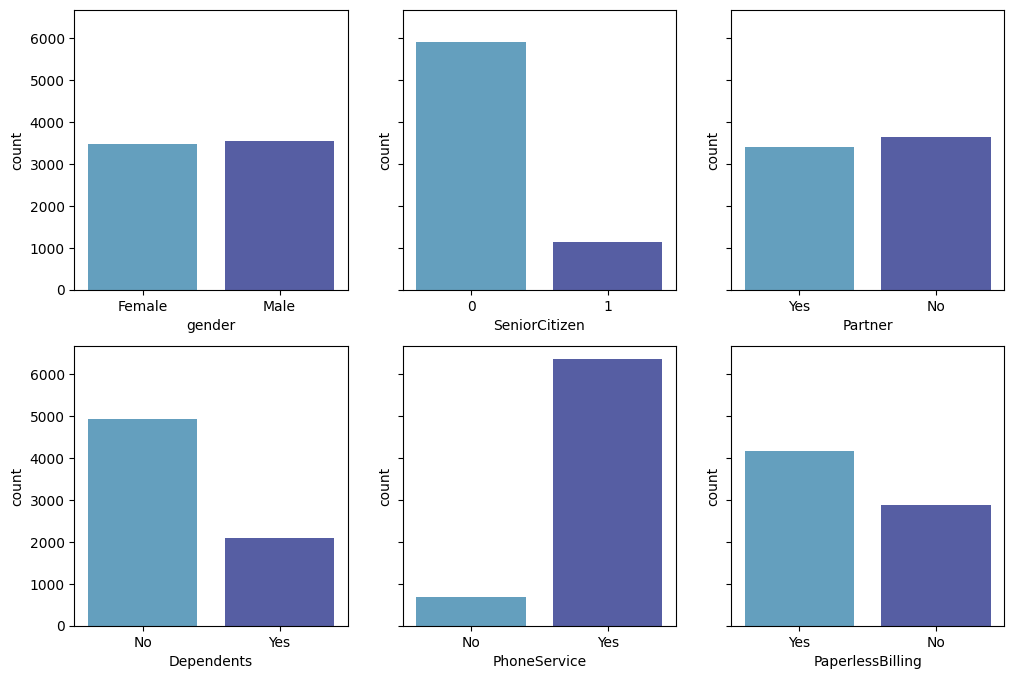

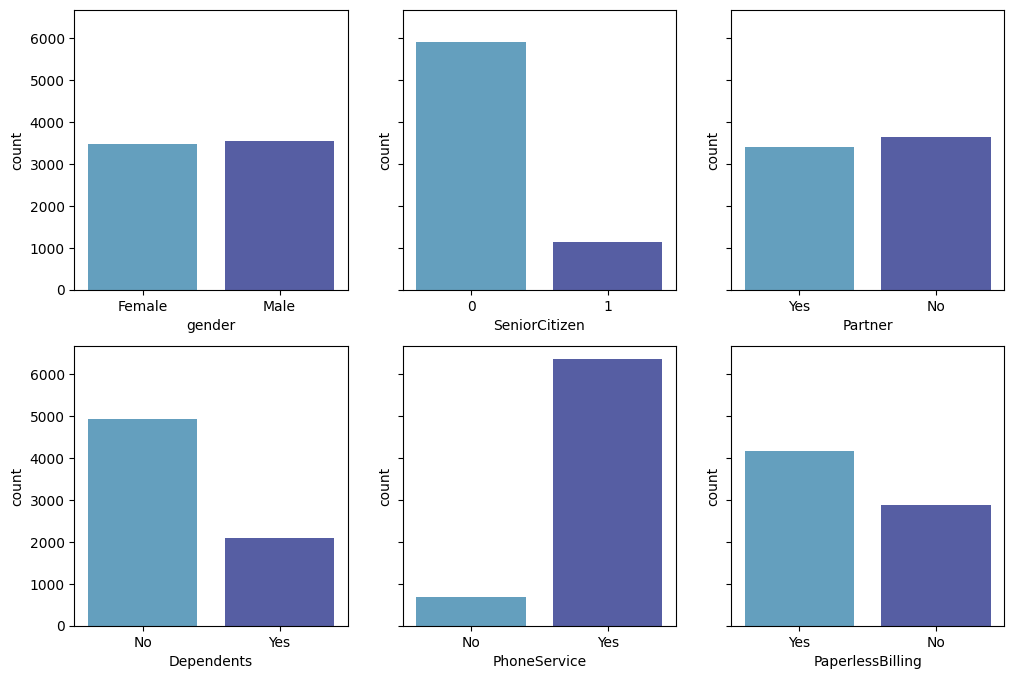

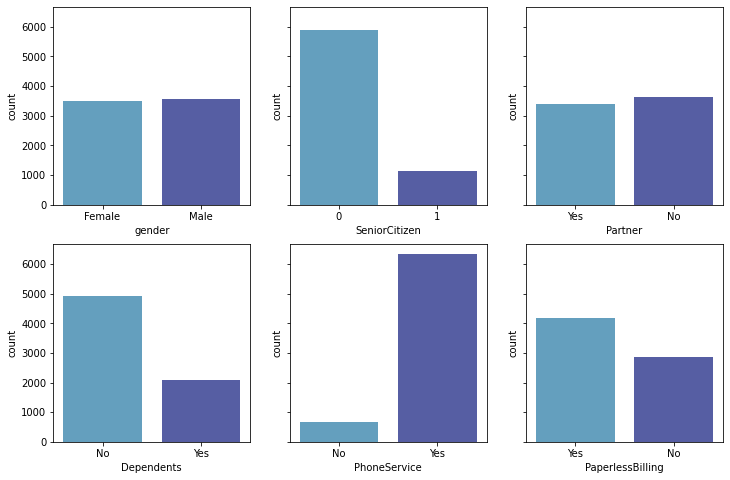

In [18]:
#exploring all the binary categorical data
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharey=True)

sns.countplot(x="gender", data=churn, ax=axes[0,0])
sns.countplot(x="SeniorCitizen", data=churn, ax=axes[0,1])
sns.countplot(x="Partner", data=churn, ax=axes[0,2])
sns.countplot(x="Dependents", data=churn, ax=axes[1,0])
sns.countplot(x="PhoneService", data=churn, ax=axes[1,1])
sns.countplot(x="PaperlessBilling", data=churn, ax=axes[1,2])


# Exploring categorical variables

1)<b>Gender Distribution</b> - About 50% of our customers are Male and other half are Female. The crosstab below shows that the outcome of the target variable doesnot depend on the Gender.

In [21]:
#exploring each binary variable and their effect on the target variable
#gender vs churn
pd.crosstab(churn["gender"], churn["Churn"], normalize = "index")

Churn,No,Yes
gender,,
Female,0.730405,0.269595
Male,0.737954,0.262046


2) <b>Age Distribution</b> - Young customers are presominant in our dataset. The cross tab calculation with respect to Age shows that a Senior customer is more likely to churn when comapared to a younger customer

In [22]:
#senior citizen vs churn
pd.crosstab(churn["SeniorCitizen"], churn["Churn"], normalize = "index")

Churn,No,Yes
SeniorCitizen,,
0,0.763497,0.236503
1,0.583187,0.416813


3) <b>Partner Distribution</b> - About half of our customers have partners and it can be said that a customer with a partner is less likely to churn

In [24]:
#partner vs churn
pd.crosstab(churn["Partner"], churn["Churn"], normalize = "index")

Churn,No,Yes
Partner,,
No,0.670239,0.329761
Yes,0.802829,0.197171


4)<b>Dependents Distribution</b> - 30% of our customers have dependents and are less likely to churn compared to a customer with no dependents.

In [26]:
#Dependents vs churn
pd.crosstab(churn["Dependents"], churn["Churn"], normalize = "index")

Churn,No,Yes
Dependents,,
No,0.687209,0.312791
Yes,0.844688,0.155312


In [28]:
#Phone services vs churn
pd.crosstab(churn["PhoneService"], churn["Churn"], normalize = "index")

Churn,No,Yes
PhoneService,,
No,0.750000,0.250000
Yes,0.732525,0.267475


In [29]:
#Paperless billing vs churn
pd.crosstab(churn["PaperlessBilling"], churn["Churn"], normalize = "index")

Churn,No,Yes
PaperlessBilling,,
No,0.836243,0.163757
Yes,0.664107,0.335893


# Other Categorical variables in the Dataset

<b>Internet Services</b> - Customers who opted for Fiber Optic type of internet services are most likely to churn. This indicates the service provided was unsatisfactory.

In [30]:
#Other categorical variables in the dataset
#Internet services vs churn
pd.crosstab(churn["InternetService"], churn["Churn"], normalize = "index")

Churn,No,Yes
InternetService,,
DSL,0.810017,0.189983
Fiber optic,0.581072,0.418928
No,0.925658,0.074342


<Axes: xlabel='TechSupport', ylabel='count'>

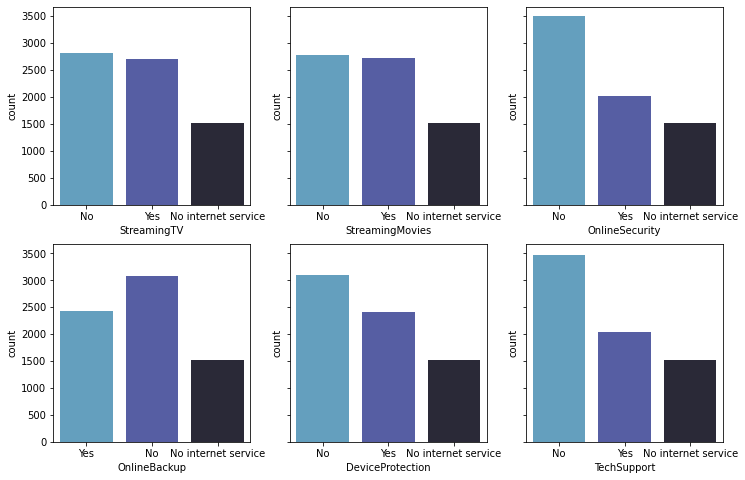

In [31]:
#Internet services related variables
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharey=True)

sns.countplot(x="StreamingTV", data=churn, ax=axes[0,0])
sns.countplot(x="StreamingMovies", data=churn, ax=axes[0,1])
sns.countplot(x="OnlineSecurity", data=churn, ax=axes[0,2])
sns.countplot(x="OnlineBackup", data=churn, ax=axes[1,0])
sns.countplot(x="DeviceProtection", data=churn, ax=axes[1,1])
sns.countplot(x="TechSupport", data=churn, ax=axes[1,2])

In [32]:
#Multiple lines vs churn
pd.crosstab(churn["MultipleLines"], churn["Churn"], normalize = "index")

Churn,No,Yes
MultipleLines,,
No,0.749188,0.250812
No phone service,0.750000,0.250000
Yes,0.713515,0.286485


<b>Payment Method</b> - Most of the customers who churned had Electronic Check as their payment method. Customers with Credit Card set as their payment are less likely to churn.

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.832685,0.167315
Credit card (automatic),0.847469,0.152531
Electronic check,0.547146,0.452854
Mailed check,0.807980,0.192020


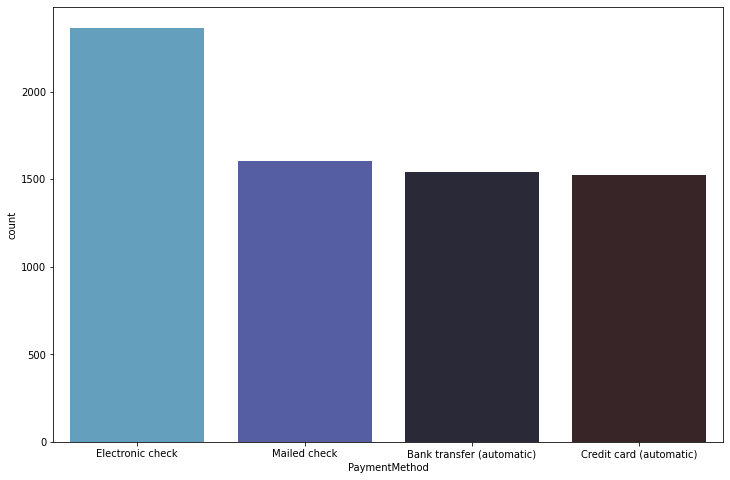

In [33]:
#Payment method vs churn
plt.figure(figsize=(12,8))
sns.countplot(x="PaymentMethod", data=churn)

pd.crosstab(churn["PaymentMethod"], churn["Churn"], normalize = "index")    #crosstab

<b>Contract</b> - 75% of our customers have month-to-month contract and have opted out of company services in the last one month compared to the one-year and two-year contract customers.

In [34]:
#Contract vs churn 
pd.crosstab(churn["Contract"], churn["Churn"], normalize = "index")    #crosstab

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887228,0.112772
Two year,0.971513,0.028487


# Exploring categorical variables

1) <b>Tenure</b> - The histogram below shows the distribution of our customers tenure with the company. We have a lot of recent customers who are just a month old and we also have long-term customers who have been with our company for 72 months. It can also be seen that long tenure customers are less likely to leave the company

<Axes: xlabel='tenure', ylabel='Count'>

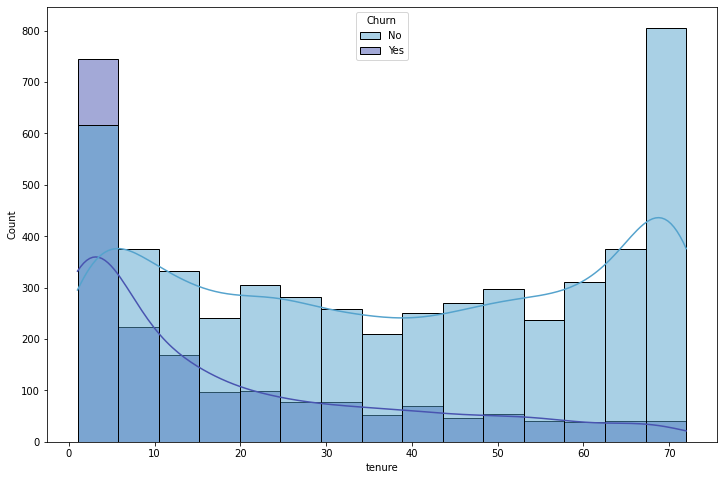

In [36]:
#Continuous variables in the dataset
#tenure distribution
plt.figure(figsize=(12,8))
sns.histplot(data=churn, x="tenure", kde=True, hue = "Churn")  

2)<b>Monthly Charges</b> - Customers pay a monthly charges as low as 20 dollars and as high as 120 dollars. There is a clear pattern in the data. Customers are most likely to churn on higher end of the histogram.

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

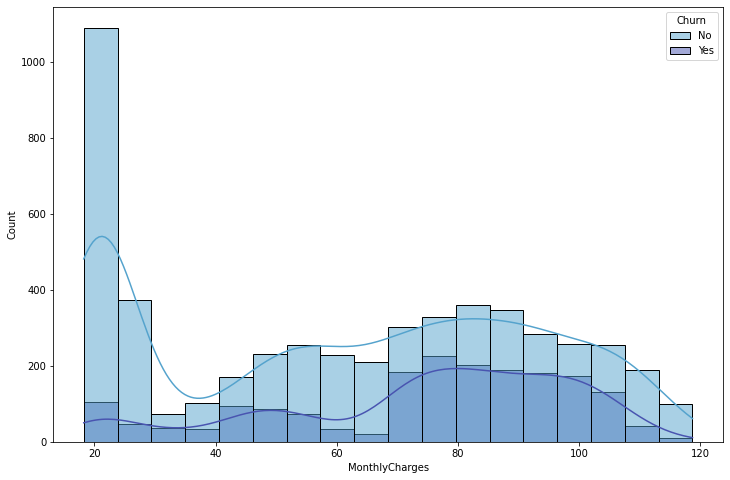

In [37]:
#Monthly charges distribution
plt.figure(figsize=(12,8))
sns.histplot(data=churn, x="MonthlyCharges", kde=True, hue = "Churn")  

# Data Preprocessing

In [38]:
#Data preprocessing
churn.drop(['customerID'], axis = 1, inplace = True)
#converting strings to numeric
def object_to_int(df):
    if df.dtype=='object':
        df = LabelEncoder().fit_transform(df)
    return df

In [39]:
churn = churn.apply(lambda x: object_to_int(x))
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<b>Feature Engineering</b> - Removing the columns in the dataset with high correlation using Pearson Correlation

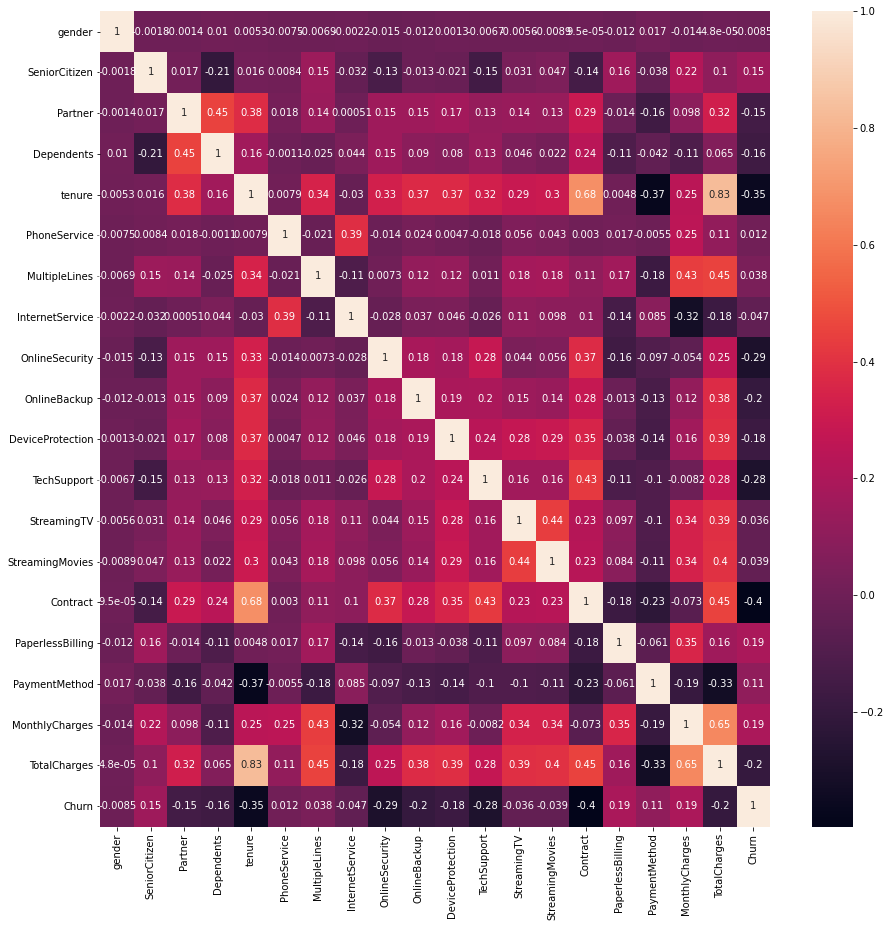

In [40]:
#Feature selection
#Using Pearson Correlation
plt.figure(figsize=(15,15))
corr = churn.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [41]:
#Correlation with output variable
corr_target = abs(corr["Churn"])

#Selecting highly correlated features
corr_features = corr_target[corr_target>0.5]
corr_features

Churn    1.0
Name: Churn, dtype: float64

<b>Splitting the data into train and validation set</b>

In [42]:
#Splitting the dataset
X = churn.drop("Churn",axis = 1)   #Feature Matrix
y = churn["Churn"]                 #Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<b>Standardizing numerical variables in the dataset</b>

In [44]:
#Standardizing numerical variables
numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler= StandardScaler()

pd.options.mode.chained_assignment = None
X_train[numeric] = scaler.fit_transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

# Prediction

<b>A) Logistic Regression</b>

In [45]:
#ML model and prediction
#Logistic Regression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression()

Accuracy: 0.7860696517412935


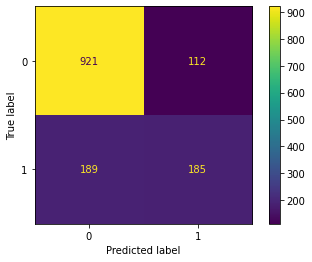

In [50]:
#Prediction
y_pred=logreg.predict(X_test)
cm = confusion_matrix(y_test,y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=logreg.classes_)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
disp.plot()
plt.show()

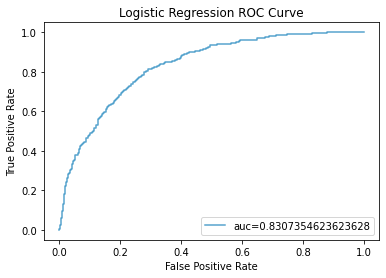

In [51]:
#AUC for logistic regression
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

<b>B) Random Forest Classifier</b>

In [52]:
#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

RandomForestClassifier()

Accuracy: 0.7853589196872779


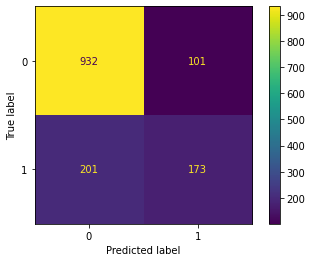

In [54]:
#prediction
y_pred=rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf.classes_)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
disp.plot()
plt.show()

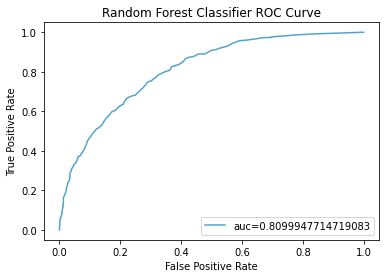

In [55]:
#AUC for Random Forest Classifier
y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Curve')
plt.show()

<b>C) Gradient Boosting</b>

In [76]:
#gradient boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


GradientBoostingClassifier()

Accuracy: 0.7953091684434968


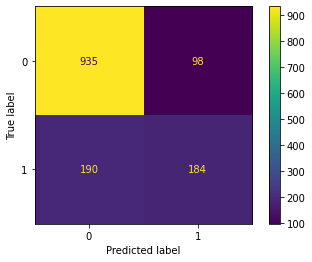

In [57]:
#prediction
y_pred=gb.predict(X_test)
cm = confusion_matrix(y_test,y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=gb.classes_)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
disp.plot()
plt.show()

# Conclusion

From the above comparison, Gradient Boosting algorithm has the best AUC score of <b>83.5% and accuracy of 79.53%</b> among the three models I have used in this analysis.